In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime
import yfinance as yf
import fredapi as fd
import plotly.graph_objects as go
from prophet import Prophet

In [125]:
#set the column and rows to fit properly in the table so column and row names can be visible
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#view and make sure that data is correct and visible for analysis
oil = yf.Ticker("CL=F")
df_oil = oil.history(period="5y")
display(df_oil.head())
                

Open       High        Low      Close  Volume  \
Date                                                                            
2020-09-08 00:00:00-04:00  39.480000  39.590000  36.130001  36.759998  720975   
2020-09-09 00:00:00-04:00  36.790001  38.450001  36.160000  38.049999  455356   
2020-09-10 00:00:00-04:00  37.799999  38.180000  36.930000  37.299999  367555   
2020-09-11 00:00:00-04:00  37.009998  37.820000  36.669998  37.330002  363787   
2020-09-14 00:00:00-04:00  37.320000  37.680000  36.820000  37.259998  347563   

                           Dividends  Stock Splits  
Date                                                
2020-09-08 00:00:00-04:00        0.0           0.0  
2020-09-09 00:00:00-04:00        0.0           0.0  
2020-09-10 00:00:00-04:00        0.0           0.0  
2020-09-11 00:00:00-04:00        0.0           0.0  
2020-09-14 00:00:00-04:00        0.0           0.0

In [126]:
#step 4 is to highlight the commodity tickers I want from yfinance using dictionary so they are easily retrievable in the notebook for data analysis
commodity_tickers ={
    "Crude Oil (WTI)": "CL=F",
    "Brent Oil": "BZ=F",
    "Gasoline": "RB=F",
    "Natural Gas": "NG=F",
    "Copper": "HG=F",
    "Gold": "GC=F",
    "Micro Gold": "MGC=F",
    "Silver": "SI=F",
    "Micro Silver": "SIL=F",
}

#step 5 is to fetch the historical data for all commodities of interest using for loop
commodity_data = {}
for name, ticker in commodity_tickers.items():
        commodity_data[name] = yf.Ticker(ticker).history(period="5y")["Close"]

#step 6 is to convert commodity data to a DataFrame
df_commodities = pd.DataFrame(commodity_data)

display(df_commodities.head())

Crude Oil (WTI)  Brent Oil  Gasoline  Natural Gas  \
Date                                                                           
2020-09-08 00:00:00-04:00        36.759998  39.779999    1.1028        2.400   
2020-09-09 00:00:00-04:00        38.049999  40.790001    1.1193        2.406   
2020-09-10 00:00:00-04:00        37.299999  40.060001    1.0977        2.323   
2020-09-11 00:00:00-04:00        37.330002  39.830002    1.0949        2.269   
2020-09-14 00:00:00-04:00        37.259998  39.610001    1.1068        2.310   

                           Copper         Gold   Micro Gold  Silver  \
Date                                                                  
2020-09-08 00:00:00-04:00  3.0125  1933.000000  1935.099976  26.864   
2020-09-09 00:00:00-04:00  3.0400  1944.699951  1946.800049  26.955   
2020-09-10 00:00:00-04:00  2.9870  1954.199951  1956.000000  27.163   
2020-09-11 00:00:00-04:00  3.0340  1937.800049  1939.500000  26.739   
2020-09-14 00:00:00-04:00  3.0665  1953.099976  1954.699951  27.229   

                           Micro Silver  
Date                                     
2020-09-08 00:00:00-04:00        26.864  
2020-09-09 00:00:00-04:00        26.955  
2020-09-10 00:00:00-04:00        27.163  
2020-09-11 00:00:00-04:00        26.739  
2020-09-14 00:00:00-04:00        27.229

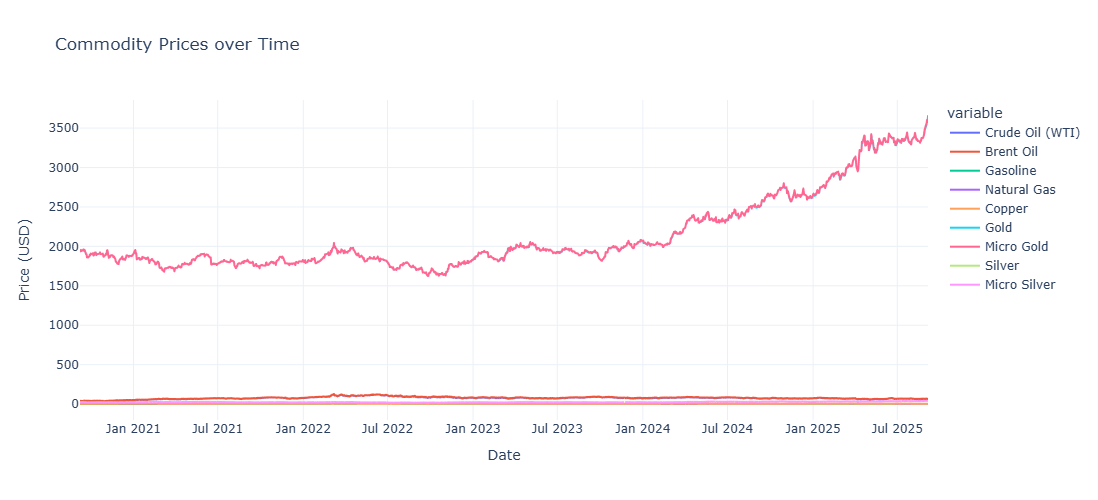

In [127]:
#step 7 is to convert the index to columns to make it complaitble for Plotly use
df_commodities = df_commodities.reset_index()

#step 8 is to create an interactive line chart in Plotly to show price of commodities 
fig = px.line(
    df_commodities, x="Date", y=df_commodities.columns[1:], 
    title="Commodity Prices over Time", 
    labels={"value":"Price (USD)", "Date":"Date"}, 
    template="plotly_white", width = 1100, height = 500
)

fig.show()

21:50:10 - cmdstanpy - INFO - Chain [1] start processing
21:50:12 - cmdstanpy - INFO - Chain [1] done processing


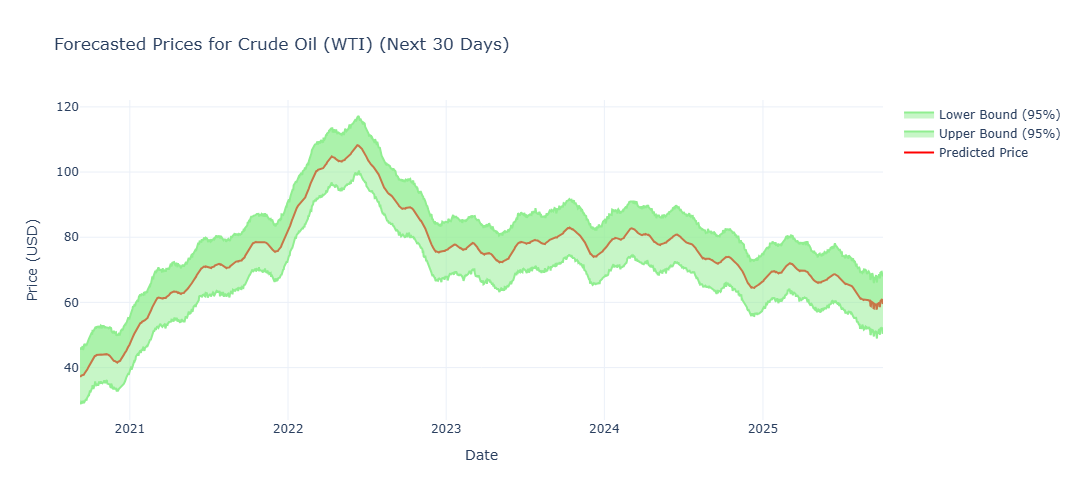

ds       yhat  yhat_upper  yhat_lower
1257 2025-09-06  58.960136   66.885634   50.009101
1258 2025-09-07  58.864211   67.764342   50.204940
1259 2025-09-08  60.225438   68.151196   51.676542
1260 2025-09-09  60.071068   68.453296   51.537492
1261 2025-09-10  59.866452   68.970212   51.565413
1262 2025-09-11  59.764473   68.694508   50.765273
1263 2025-09-12  59.846562   68.100554   51.649409
1264 2025-09-13  58.273553   67.231666   50.151678
1265 2025-09-14  58.195205   65.891579   49.542100
1266 2025-09-15  59.590637   67.497826   50.714297
1267 2025-09-16  59.486945   67.348212   50.848591
1268 2025-09-17  59.348842   67.353673   50.814538
1269 2025-09-18  59.328114   67.890570   51.207200
1270 2025-09-19  59.504659   68.371568   51.220648
1271 2025-09-20  58.037381   66.689737   49.701668
1272 2025-09-21  58.073772   66.101181   48.935434
1273 2025-09-22  59.590399   67.799799   50.954139
1274 2025-09-23  59.611595   67.848867   50.347541
1275 2025-09-24  59.599177   67.966224   50.849670
1276 2025-09-25  59.701970   68.128822   51.763122
1277 2025-09-26  59.996937   68.651517   51.838014
1278 2025-09-27  58.640149   67.369674   50.486872
1279 2025-09-28  58.776437   67.669564   50.092459
1280 2025-09-29  60.379960   69.270365   51.984410
1281 2025-09-30  60.472954   68.909605   52.099999
1282 2025-10-01  60.515500   69.359533   51.655276
1283 2025-10-02  60.655103   69.407149   52.239363
1284 2025-10-03  60.967846   68.802337   52.332854
1285 2025-10-04  59.609386   68.019443   50.394636
1286 2025-10-05  59.724608   68.529287   50.922555

In [128]:
#Step 9 use prophet to forecast/predict price movement for the next 30 days
#first I will highlight the commodity I want to predict
commodity_name ="Crude Oil (WTI)"
commodity_ticker ="CL=F"

# then next is to fetch the historical data for the commodity, in this instance, crude oil
df_commodity = yf.Ticker(commodity_ticker).history(period="5y")["Close"].reset_index()
df_commodity = df_commodity.rename(columns={"Date":"ds", "Close":"y"})
df_commodity["ds"] = pd.to_datetime(df_commodity["ds"]).dt.tz_localize(None) # here I am removing the timezone from the commodity data

#step 10 prophecy begins... first I will fit the prophet based on the confidence level I want
model = Prophet(interval_width=0.95) # 95% confidence
model.fit(df_commodity)

future_dates = model.make_future_dataframe(periods=30, freq="D") # this generates/creates the future dates for the next 90 days

forecast = model.predict(future_dates) # this predicts the future price
forecast= forecast[["ds", "yhat", "yhat_upper", "yhat_lower"]] #ds is for date, yhat is the predicted price, yhat_upper is the highest price it can go and yhat_lower is the lowest predicted price

# use plotly graph objects to visualize
fig = go.Figure()
fig.add_trace(go.Scatter(x=forecast["ds"], y=forecast["yhat"],
                         mode="lines", name="Predicted Price", line=dict(color="red")))
fig.add_trace(go.Scatter(x=forecast["ds"], y=forecast["yhat_upper"],
                         mode="lines", name="Upper Bound (95%)", line=dict(color="lightgreen"), fill="tonexty"))
fig.add_trace(go.Scatter(x=forecast["ds"], y=forecast["yhat_lower"],
                         mode="lines", name="Lower Bound (95%)", line=dict(color="lightgreen"), fill="tonexty")) 
fig.update_layout(
    title=f"Forecasted Prices for {commodity_name} (Next 30 Days)",
    xaxis_title="Date",
    yaxis_title="Price (USD)",
    template="plotly_white", width=1100, height=500
)
#show the Plotly Chart
fig.show()
display(forecast.tail(30))

In [129]:
#Step 9 use prophet to forecast/predict price movement for the next 30 days
#first I will highlight the commodity I want to predict
commodity_name = "Brent Oil"
commodity_ticker ="BZ=F"
# then next is to fetch the historical data for the commodity, in this instance, crude oil
df_commodity = yf.Ticker(commodity_ticker).history(period="5y")[["Close"]].reset_index()
df_commodity = df_commodity.rename(columns={"Date":"ds", "Close":"y"})
df_commodity["ds"] = pd.to_datetime(df_commodity["ds"]).dt.tz_localize(None) # here I am removing the timezone from the commodity data

#step 10 prophecy begins... first I will fit the prophet based on the confidence level I want
model = Prophet(interval_width=0.95)
model.fit(df_commodity)
# this generates/creates the future dates for the next 30 days
future_dates = model.make_future_dataframe(periods=30, freq="D")
forecast = model.predict (future_dates) # this predicts the future price
forecast = forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]]#ds is for date, yhat is the predicted price, yhat_upper is the highest price it can go and yhat_lower is the lowest predicted price

# use plotly graph objects to visualize
fig = go.Figure()
fig.add_trace(go.Scatter(x=forecast["ds"], y=forecast["yhat"], mode="lines", name="Predicted Price", line=dict(color="red")))
fig.add_trace(go.Scatter(x=forecast["ds"], y=forecast["yhat_lower"], mode="lines", name="Lower Bound 95%", line=dict(color="lightgreen"), fill="tonexty"))
fig.add_trace(go.Scatter(x=forecast["ds"], y=forecast["yhat_upper"], mode="lines", name="Upper Bound 95%", line=dict(color="lightgreen"), fill="tonexty"))

fig.update_layout(
    title=f"Forecasted Prices for {commodity_name} (Next 30 Days)",
    xaxis_title="Date",
    yaxis_title="Price (USD)",
    template="plotly_white", width=1100, height=500
)
#show the Plotly Chart
fig.show()
print()
display(forecast.tail(30))

21:50:14 - cmdstanpy - INFO - Chain [1] start processing
21:50:14 - cmdstanpy - INFO - Chain [1] done processing


ds       yhat  yhat_lower  yhat_upper
1258 2025-09-06  63.316762   55.437832   71.819649
1259 2025-09-07  63.209108   54.799580   70.924204
1260 2025-09-08  63.447362   55.247245   71.563833
1261 2025-09-09  63.272087   55.189511   71.122696
1262 2025-09-10  63.030910   55.122535   70.584926
1263 2025-09-11  62.949799   55.467329   71.179581
1264 2025-09-12  63.044849   54.963091   71.425429
1265 2025-09-13  62.456914   53.915012   70.339034
1266 2025-09-14  62.340668   54.218747   70.073902
1267 2025-09-15  62.590288   54.125802   70.967213
1268 2025-09-16  62.446588   54.735398   70.153035
1269 2025-09-17  62.256874   53.882967   70.467006
1270 2025-09-18  62.246239   53.917283   70.308572
1271 2025-09-19  62.429367   54.385006   70.216242
1272 2025-09-20  61.945209   53.175116   70.277622
1273 2025-09-21  61.946095   53.562982   70.128171
1274 2025-09-22  62.323481   54.174647   70.322103
1275 2025-09-23  62.315159   54.002399   70.205999
1276 2025-09-24  62.265195   54.172203   70.294600
1277 2025-09-25  62.395312   54.267476   70.092703
1278 2025-09-26  62.716785   55.161660   70.582614
1279 2025-09-27  62.365209   54.558633   70.364851
1280 2025-09-28  62.489701   54.233881   70.445959
1281 2025-09-29  62.978732   55.563567   70.668716
1282 2025-09-30  63.067412   55.081194   70.397755
1283 2025-10-01  63.097505   55.474492   71.098001
1284 2025-10-02  63.288860   54.431201   71.542259
1285 2025-10-03  63.651359   55.694401   71.480065
1286 2025-10-04  63.319711   55.121925   71.623111
1287 2025-10-05  63.442678   55.241924   71.583426

In [130]:
import os
print(os.getcwd())

C:\Users\Gloria Daniel\Zipporah's First Time Using Jupyter\Python Finance Project


In [131]:
!pip install python-dotenv
import os
from dotenv import load_dotenv

load_dotenv(dotenv_path="FREDAPI.env")

# Retrieve the API key
api_key = os.getenv("FRED_API_KEY")

# Check if the key loaded correctly
if api_key:
    print("API key loaded successfully")
else:
    print("API key NOT found")

# Use the API key in FRED connection
fred = fd.Fred(api_key=api_key)

API key loaded successfully


In [132]:
data = fred.search("nominal broad dollar index")
data.head(2)

id realtime_start realtime_end  \
series id                                            
DTWEXBGS      DTWEXBGS     2025-09-07   2025-09-07   
TWEXBGSMTH  TWEXBGSMTH     2025-09-07   2025-09-07   

                                      title observation_start observation_end  \
series id                                                                       
DTWEXBGS    Nominal Broad U.S. Dollar Index        2006-01-02      2025-08-29   
TWEXBGSMTH  Nominal Broad U.S. Dollar Index        2006-01-01      2025-08-01   

           frequency frequency_short               units         units_short  \
series id                                                                      
DTWEXBGS       Daily               D  Index Jan 2006=100  Index Jan 2006=100   
TWEXBGSMTH   Monthly               M  Index Jan 2006=100  Index Jan 2006=100   

                seasonal_adjustment seasonal_adjustment_short  \
series id                                                       
DTWEXBGS    Not Seasonally Adjusted                       NSA   
TWEXBGSMTH  Not Seasonally Adjusted                       NSA   

                         last_updated popularity notes  
series id                                               
DTWEXBGS    2025-09-02 15:19:49-05:00         81  None  
TWEXBGSMTH  2025-09-02 15:19:41-05:00         60  None

In [133]:
data=fred.search("weekly economic index")
data.head(1)

id realtime_start realtime_end  \
series id                                    
WEI        WEI     2025-09-07   2025-09-07   

                                                 title observation_start  \
series id                                                                  
WEI        Weekly Economic Index (Lewis-Mertens-Stock)        2008-01-05   

          observation_end                frequency frequency_short  units  \
series id                                                                   
WEI            2025-08-30  Weekly, Ending Saturday               W  Index   

          units_short      seasonal_adjustment seasonal_adjustment_short  \
series id                                                                  
WEI             Index  Not Seasonally Adjusted                       NSA   

                        last_updated popularity  \
series id                                         
WEI        2025-09-04 10:35:40-05:00         65   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               notes  
series id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [134]:
usd=fred.get_series("DTWEXBGS")
df_usd=pd.DataFrame(usd).reset_index()
df_usd = df_usd.rename(columns={0:"y", "index":"ds"})
display(df_usd.head())

fig=px.line(df_usd, x="ds", y="y", title="Nominal Broad Dollar Index 2006 - Present")
fig.show()

ds         y
0 2006-01-02  101.4155
1 2006-01-03  100.7558
2 2006-01-04  100.2288
3 2006-01-05  100.2992
4 2006-01-06  100.0241

21:50:40 - cmdstanpy - INFO - Chain [1] start processing
21:50:51 - cmdstanpy - INFO - Chain [1] done processing


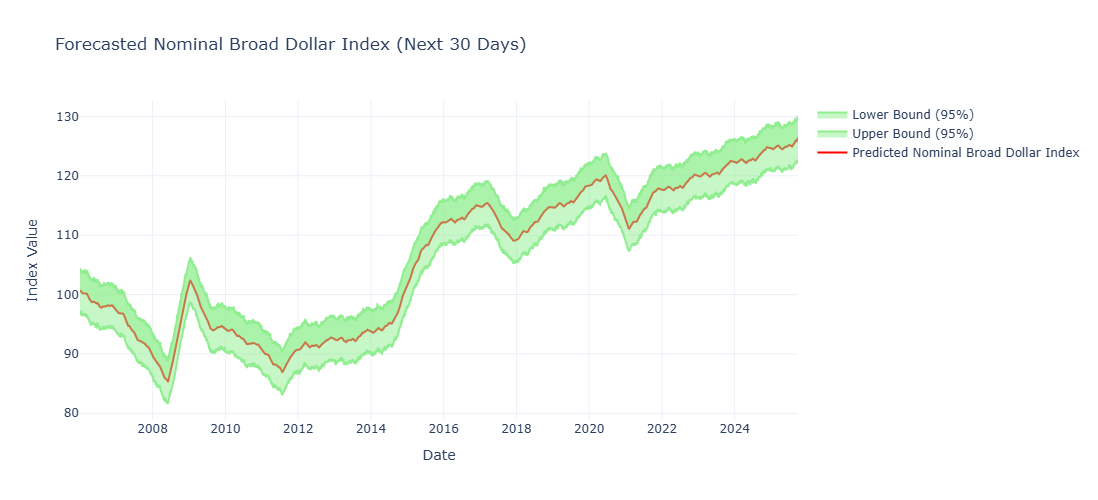

ds        yhat  yhat_upper  yhat_lower
5130 2025-08-30  125.874947  129.447060  122.126656
5131 2025-08-31  125.894271  129.589659  122.251569
5132 2025-09-01  125.710892  129.378139  121.888721
5133 2025-09-02  125.745471  129.610836  122.217447
5134 2025-09-03  125.752634  129.376959  122.203589
5135 2025-09-04  125.765133  129.612514  122.342056
5136 2025-09-05  125.772661  129.758937  122.166507
5137 2025-09-06  125.986005  129.724466  122.454306
5138 2025-09-07  125.998067  129.389543  122.254247
5139 2025-09-08  125.808112  129.590325  122.235919
5140 2025-09-09  125.836965  129.330666  122.201487
5141 2025-09-10  125.839401  129.320145  122.183977
5142 2025-09-11  125.848311  129.378117  122.117219
5143 2025-09-12  125.853499  129.459376  122.265546
5144 2025-09-13  126.065843  129.775978  122.611315
5145 2025-09-14  126.078307  129.564203  122.354243
5146 2025-09-15  125.890187  129.685894  122.347135
5147 2025-09-16  125.922303  129.701342  122.543368
5148 2025-09-17  125.929393  129.624384  122.311060
5149 2025-09-18  125.944274  129.641878  122.275767
5150 2025-09-19  125.956641  129.652827  122.059529
5151 2025-09-20  126.177230  129.950729  122.495903
5152 2025-09-21  126.198830  129.921797  122.446758
5153 2025-09-22  126.020534  129.804608  122.458600
5154 2025-09-23  126.062937  129.805997  122.635025
5155 2025-09-24  126.080531  129.850141  122.523927
5156 2025-09-25  126.105872  129.487795  122.501337
5157 2025-09-26  126.128390  130.063054  122.344196
5158 2025-09-27  126.358554  130.021659  122.778377
5159 2025-09-28  126.388891  129.946016  122.792386

In [135]:
df_usd["ds"] = pd.to_datetime(df_usd["ds"]).dt.tz_localize(None)

model = Prophet(interval_width=0.95) # 95% confidence
model.fit(df_usd)

future_dates = model.make_future_dataframe(periods=30, freq="D") # this generates/creates the future dates for the next 90 days

forecast = model.predict(future_dates) # this predicts the future price
forecast= forecast[["ds", "yhat", "yhat_upper", "yhat_lower"]] #ds is for date, yhat is the predicted price, yhat_upper is the highest price it can go and yhat_lower is the lowest predicted price

# use plotly graph objects to visualize
fig = go.Figure()
fig.add_trace(go.Scatter(x=forecast["ds"], y=forecast["yhat"],
                         mode="lines", name="Predicted Nominal Broad Dollar Index", line=dict(color="red")))
fig.add_trace(go.Scatter(x=forecast["ds"], y=forecast["yhat_upper"],
                         mode="lines", name="Upper Bound (95%)", line=dict(color="lightgreen"), fill="tonexty"))
fig.add_trace(go.Scatter(x=forecast["ds"], y=forecast["yhat_lower"],
                         mode="lines", name="Lower Bound (95%)", line=dict(color="lightgreen"), fill="tonexty")) 
fig.update_layout(
    title=f"Forecasted Nominal Broad Dollar Index (Next 30 Days)",
    xaxis_title="Date",
    yaxis_title="Index Value",
    template="plotly_white", width=1100, height=500
)
#show the Plotly Chart
fig.show()
display(forecast.tail(30))

ds     y
0 2008-01-05  1.94
1 2008-01-12  1.93
2 2008-01-19  1.90
3 2008-01-26  1.41
4 2008-02-02  1.13

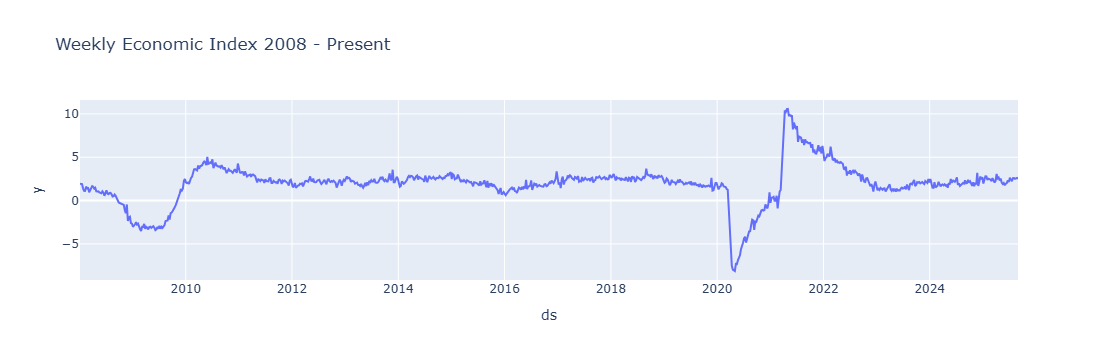

In [136]:
wei=fred.get_series("WEI")
df_wei=pd.DataFrame(wei).reset_index()
df_wei = df_wei.rename(columns={0:"y", "index":"ds"})
display(df_wei.head())

fig=px.line(df_wei, x="ds", y="y", title="Weekly Economic Index 2008 - Present")
fig.show()

In [137]:
#define the economic indicators (nominal broad dollar index and weekly economic index)
usdstrength_symbol = "DTWEXBGS" # Nominal Broad Dollar Index
economicindex_symbol = "WEI" # Weekly Economic Index


# Fetch series and convert to DataFrame
df_usdstrength = fred.get_series(usdstrength_symbol, start=df_commodities["Date"].min(), end=df_commodities["Date"].max()).to_frame(name="Nominal Broad Dollar Index")
df_usdstrength.index.name = "Date"

df_economicindex = fred.get_series(economicindex_symbol, start=df_commodities["Date"].min(), end=df_commodities["Date"].max()).to_frame(name="Weekly Economic Index")
df_economicindex.index.name = "Date"

#reset index to merge with commodities
df_usdstrength = df_usdstrength.reset_index()
df_economicindex = df_economicindex.reset_index()

display(df_usdstrength.head())
display(df_economicindex.tail())

#merge with commodity prices using merge_asof() for better date alignment 
df_commodities["Date"] = pd.to_datetime(df_commodities["Date"]).dt.tz_localize(None) #remove timezone
df_usdstrength["Date"] = pd.to_datetime(df_usdstrength["Date"])
df_economicindex["Date"] = pd.to_datetime(df_economicindex["Date"])

df_commodities = pd.merge_asof(df_commodities.sort_values("Date"), df_usdstrength.sort_values("Date"), left_on="Date", right_on="Date", direction="backward")
df_commodities = pd.merge_asof(df_commodities.sort_values("Date"), df_economicindex.sort_values("Date"), left_on="Date", right_on="Date", direction="backward")

display(df_commodities.head())
display(df_commodities.tail())

#plot commodity prices vs USD Strength and Economic Activity
fig = px.line(
    df_commodities, x="Date", y=["Crude Oil (WTI)", "Brent Oil", "Nominal Broad Dollar Index", "Weekly Economic Index"],
    title="Commodity Prices vs USD Strength and Economic Activity",
    template="plotly_white", width=1100, height=500
)

fig.show()

Date  Nominal Broad Dollar Index
0 2006-01-02                    101.4155
1 2006-01-03                    100.7558
2 2006-01-04                    100.2288
3 2006-01-05                    100.2992
4 2006-01-06                    100.0241

Date  Weekly Economic Index
917 2025-08-02                   2.59
918 2025-08-09                   2.50
919 2025-08-16                   2.53
920 2025-08-23                   2.61
921 2025-08-30                   2.52

Date  Crude Oil (WTI)  Brent Oil  Gasoline  Natural Gas  Copper  \
0 2020-09-08        36.759998  39.779999    1.1028        2.400  3.0125   
1 2020-09-09        38.049999  40.790001    1.1193        2.406  3.0400   
2 2020-09-10        37.299999  40.060001    1.0977        2.323  2.9870   
3 2020-09-11        37.330002  39.830002    1.0949        2.269  3.0340   
4 2020-09-14        37.259998  39.610001    1.1068        2.310  3.0665   

          Gold   Micro Gold  Silver  Micro Silver  Nominal Broad Dollar Index  \
0  1933.000000  1935.099976  26.864        26.864                    116.4725   
1  1944.699951  1946.800049  26.955        26.955                    116.1396   
2  1954.199951  1956.000000  27.163        27.163                    115.8906   
3  1937.800049  1939.500000  26.739        26.739                    116.0963   
4  1953.099976  1954.699951  27.229        27.229                    115.6523   

   Weekly Economic Index  
0                  -2.28  
1                  -2.28  
2                  -2.28  
3                  -2.28  
4                  -3.39

Date  Crude Oil (WTI)  Brent Oil  Gasoline  Natural Gas  Copper  \
1253 2025-08-29        64.010002  68.120003    2.1876        2.997  4.5185   
1254 2025-09-02        65.589996  69.139999    2.0428        3.009  4.5695   
1255 2025-09-03        63.970001  67.599998    2.0120        3.064  4.5585   
1256 2025-09-04        63.480000  66.989998    2.0095        3.074  4.4880   
1257 2025-09-05        61.869999  65.110001    1.9642        3.048  4.4825   

             Gold   Micro Gold     Silver  Micro Silver  \
1253  3473.699951  3487.199951  40.200001     40.200001   
1254  3549.399902  3562.899902  41.070999     41.070999   
1255  3593.199951  3606.100098  41.542000     41.542000   
1256  3565.800049  3577.300049  40.910999     40.910999   
1257  3653.300049  3653.300049  41.074001     41.551998   

      Nominal Broad Dollar Index  Weekly Economic Index  
1253                    120.6028                   2.61  
1254                    120.6028                   2.52  
1255                    120.6028                   2.52  
1256                    120.6028                   2.52  
1257                    120.6028                   2.52

In [145]:
North_America_Rig_Count = "08-29-2025 North America Rig Count Report.xlsx"

# Load NAM Monthly but skip the messy top rows
df = pd.read_excel(North_America_Rig_Count, sheet_name="NAM Monthly", skiprows=6, header=0)

# Drop all-empty columns and rows
df = df.dropna(axis=1, how="all")
df = df.dropna(axis=0, how="all")

# Reset index
df = df.reset_index(drop=True)
df.columns = ["Country", "County", "Basin", "GOM", "DrillFor", "Location", "State/Province", "Trajectory", "Year", "Month", "Rig Count Value"]
df = df.drop(index=0).reset_index(drop=True)

display(df.head(20))

C:\Users\Gloria Daniel\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:85: UserWarning:

Unknown extension is not supported and will be removed



Country                County  Basin GOM DrillFor Location State/Province  \
0   CANADA       FOOTHILLS FRONT  Other  No      Gas     Land        ALBERTA   
1   CANADA  SOUTHEASTERN ALBERTA  Other  No      Gas     Land        ALBERTA   
2   CANADA  EAST CENTRAL ALBERTA  Other  No      Oil     Land        ALBERTA   
3   CANADA       FOOTHILLS FRONT  Other  No      Oil     Land        ALBERTA   
4   CANADA  NORTHEASTERN ALBERTA  Other  No      Oil     Land        ALBERTA   
5   CANADA  NORTHWESTERN ALBERTA  Other  No      Oil     Land        ALBERTA   
6   CANADA  SOUTHEASTERN ALBERTA  Other  No      Oil     Land        ALBERTA   
7   CANADA       CENTRAL ALBERTA  Other  No      Gas     Land        ALBERTA   
8   CANADA             Foothills  Other  No      Gas     Land        ALBERTA   
9   CANADA       FOOTHILLS FRONT  Other  No      Gas     Land        ALBERTA   
10  CANADA  NORTHWESTERN ALBERTA  Other  No      Gas     Land        ALBERTA   
11  CANADA  SOUTHEASTERN ALBERTA  Other  No      Gas     Land        ALBERTA   
12  CANADA       CENTRAL ALBERTA  Other  No      Oil     Land        ALBERTA   
13  CANADA  EAST CENTRAL ALBERTA  Other  No      Oil     Land        ALBERTA   
14  CANADA             Foothills  Other  No      Oil     Land        ALBERTA   
15  CANADA       FOOTHILLS FRONT  Other  No      Oil     Land        ALBERTA   
16  CANADA  NORTHEASTERN ALBERTA  Other  No      Oil     Land        ALBERTA   
17  CANADA  NORTHWESTERN ALBERTA  Other  No      Oil     Land        ALBERTA   
18  CANADA  SOUTHEASTERN ALBERTA  Other  No      Oil     Land        ALBERTA   
19  CANADA       CENTRAL ALBERTA  Other  No      Gas     Land        ALBERTA   

     Trajectory  Year Month Rig Count Value  
0   Directional  2013     1               6  
1   Directional  2013     1            2.75  
2   Directional  2013     1            9.75  
3   Directional  2013     1               1  
4   Directional  2013     1             9.5  
5   Directional  2013     1            2.75  
6   Directional  2013     1            2.25  
7    Horizontal  2013     1               5  
8    Horizontal  2013     1            0.75  
9    Horizontal  2013     1            67.5  
10   Horizontal  2013     1            2.75  
11   Horizontal  2013     1               1  
12   Horizontal  2013     1              35  
13   Horizontal  2013     1            9.75  
14   Horizontal  2013     1             0.5  
15   Horizontal  2013     1              70  
16   Horizontal  2013     1              24  
17   Horizontal  2013     1           31.25  
18   Horizontal  2013     1           13.75  
19     Vertical  2013     1            0.75

In [139]:
print(df.columns)

Index(['Country', 'County', 'Basin', 'GOM', 'DrillFor', 'Location',
       'State/Province', 'Trajectory', 'Year', 'Month', 'Rig Count Value'],
      dtype='object')


C:\Users\Gloria Daniel\AppData\Local\Temp\ipykernel_10932\3263500100.py:6: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\Gloria Daniel\AppData\Local\Temp\ipykernel_10932\3263500100.py:29: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



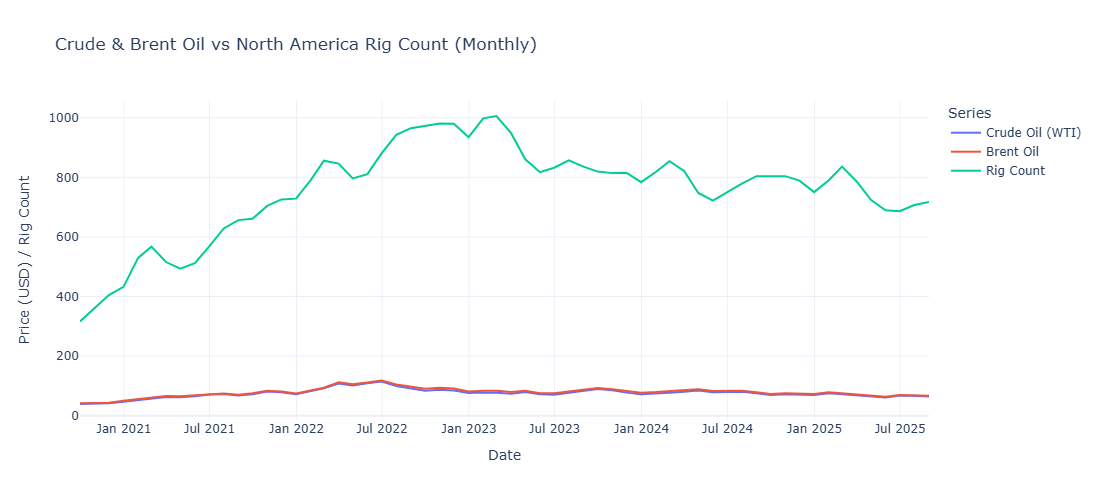

In [144]:
# Change the Month column to numbers, maybe this can resolve the errors in previous code?
month_map = {
    "Jan":1, "Feb":2, "Mar":3, "Apr":4, "May":5, "Jun":6,
    "Jul":7, "Aug":8, "Sep":9, "Oct":10, "Nov":11, "Dec":12
}
df["Month"] = df["Month"].replace(month_map)
df["Month"] = pd.to_numeric(df["Month"], errors="coerce")
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")
df["Rig Count Value"] = pd.to_numeric(df["Rig Count Value"], errors="coerce")

# Drop rows 
df = df.dropna(subset=["Year", "Month", "Rig Count Value"])

# create a month-end Date so rigs align with monthly oil averages
df["Date"] = pd.to_datetime({
    "year": df["Year"].astype(int),
    "month": df["Month"].astype(int),
    "day": 1
}) + pd.offsets.MonthEnd(0)

#group the rigs
df_rigs = (df.groupby("Date", as_index=False)["Rig Count Value"]
             .sum()
             .rename(columns={"Rig Count Value": "Rig Count"}))

# Oil monthly average (month-end)
df_commodities["Date"] = pd.to_datetime(df_commodities["Date"]).dt.tz_localize(None)
df_oil_m = (df_commodities.set_index("Date")
            .resample("M")[["Crude Oil (WTI)", "Brent Oil"]]
            .mean()
            .reset_index())

# Ensure evverything is in numbers just in case
for c in ["Crude Oil (WTI)", "Brent Oil"]:
    df_oil_m[c] = pd.to_numeric(df_oil_m[c], errors="coerce")

# then merge monthly rigs with monthly prices
df_merged = pd.merge(df_oil_m, df_rigs, on="Date", how="inner")

# Create a long-form plot here since I was getting an error messgae for using wide-form
df_long = df_merged.melt(
    id_vars="Date",
    value_vars=["Crude Oil (WTI)", "Brent Oil", "Rig Count"],
    var_name="Series",
    value_name="Value"
)

fig = px.line(
    df_long, x="Date", y="Value", color="Series",
    title="Crude & Brent Oil vs North America Rig Count (Monthly)",
    labels={"Value": "Price (USD) / Rig Count", "Date": "Date"},
    template="plotly_white", width=1100, height=500
)
fig.show()
